In [2]:
!pip install kaggle

In [3]:
# prompt: configure kaggle.json

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 94% 153M/163M [00:02<00:00, 84.5MB/s]
100% 163M/163M [00:02<00:00, 65.8MB/s]


In [5]:
# prompt: # extract the compressed data

!unzip face-mask-dataset.zip


Streaming output truncated to the last 5000 lines.
  inflating: data/with_mask/with_mask_3297.jpg  
  inflating: data/with_mask/with_mask_3298.jpg  
  inflating: data/with_mask/with_mask_3299.jpg  
  inflating: data/with_mask/with_mask_33.jpg  
  inflating: data/with_mask/with_mask_330.jpg  
  inflating: data/with_mask/with_mask_3300.jpg  
  inflating: data/with_mask/with_mask_3301.jpg  
  inflating: data/with_mask/with_mask_3302.jpg  
  inflating: data/with_mask/with_mask_3303.jpg  
  inflating: data/with_mask/with_mask_3304.jpg  
  inflating: data/with_mask/with_mask_3305.jpg  
  inflating: data/with_mask/with_mask_3306.jpg  
  inflating: data/with_mask/with_mask_3307.jpg  
  inflating: data/with_mask/with_mask_3308.jpg  
  inflating: data/with_mask/with_mask_3309.jpg  
  inflating: data/with_mask/with_mask_331.jpg  
  inflating: data/with_mask/with_mask_3310.jpg  
  inflating: data/with_mask/with_mask_3311.jpg  
  inflating: data/with_mask/with_mask_3312.jpg  
  inflating: data/with

In [6]:
!ls

data  face-mask-dataset.zip  kaggle.json  my_model.h5  sample_data


In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [8]:
# prompt: number of files in '/content/data/with_mask'

import os

num_files = len(os.listdir('/content/data/with_mask'))
print("Number of files in '/content/data/with_mask':", num_files)


Number of files in '/content/data/with_mask': 3725


In [9]:
# prompt: number of files in '/content/data/without_mask'

num_files = len(os.listdir('/content/data/without_mask'))
print("Number of files in '/content/data/without_mask':", num_files)


Number of files in '/content/data/without_mask': 3828


In [10]:
# prompt: create lables

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

labels = with_mask_labels + without_mask_labels


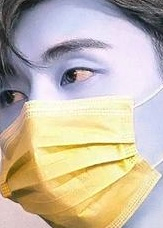

In [11]:
# prompt: display a image '/content/data/with_mask/with_mask_1545.jpg'

img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
cv2_imshow(img)


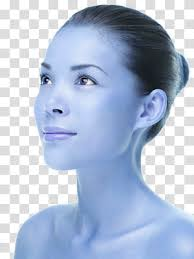

In [12]:
# prompt: display image '/content/data/without_mask/without_mask_2925.jpg'

img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
cv2_imshow(img)


In [13]:
# prompt: convert all the images in '/content/data/with_mask' and '/content/data/without_mask' to numpy array

with_mask_path = '/content/data/with_mask/'
with_mask_files = os.listdir('/content/data/with_mask')
without_mask_files = os.listdir('/content/data/without_mask')
data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [14]:
# prompt: data info

import numpy as np
print("Data shape:", np.array(data).shape)
print("Labels shape:", np.array(labels).shape)


Data shape: (7553, 128, 128, 3)
Labels shape: (7553,)


In [15]:
# prompt: convet data into numpy array

import numpy as np
X = np.array(data)
Y = np.array(labels)


In [16]:
# prompt: split the data into train test

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (6042, 128, 128, 3)
X_test shape: (1511, 128, 128, 3)
y_train shape: (6042,)
y_test shape: (1511,)


In [17]:
type(y_train)

numpy.ndarray

In [18]:
# prompt: scale the data

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255


In [19]:
import tf_keras as keras
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
# training the neural network
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=10)

In [ ]:
 model.output.shape

TensorShape([None, 2])

In [ ]:
y_test

array([1, 0, 1, ..., 1, 0, 0])

In [ ]:
y_test = np.eye(2)[y_test]

In [21]:
# prompt: load the model "my_model.h5"
from tensorflow.keras.models import load_model
loaded_model = load_model('my_model.h5')

In [26]:
y_pred = loaded_model.predict(X_test_scaled)

print(f"Shape of y_pred: {y_pred.shape}")
print(f"Shape of y_test: {y_test.shape}")

48/48 [==============================] - 13s 272ms/step
Shape of y_pred: (1511, 2)
Shape of y_test: (1511, 1)


In [29]:
# prompt: one hot encode y_test

y_test_coded = keras.utils.to_categorical(y_test, num_of_classes)
y_test_coded.shape

(1511, 2)

In [24]:
y_test = y_test.reshape(-1, 1)

print(f"Shape of y_test after reshape: {y_test.shape}")

Shape of y_test after reshape: (1511, 1)


In [33]:
y_pred

array([[0.5224825 , 0.52821755],
       [0.50775313, 0.51520675],
       [0.5061636 , 0.5209657 ],
       ...,
       [0.5156972 , 0.52818274],
       [0.51029843, 0.5224759 ],
       [0.50642675, 0.5291713 ]], dtype=float32)

In [32]:
y_test_coded

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [31]:
y_test

array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [ ]:
# prompt: save the model

model.save('my_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# prompt: save model in keras format

model.save('my_model.keras')


In [ ]:
# prompt: save weights

model.save_weights('my_model_weight.h5')
